Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\Multi Linear Regression\ToyotaCorolla.csv',encoding='latin1')

In [4]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
data.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
data.shape

(1436, 38)

<b>Selection of Variables, below variables are selected on the basis of their data variablity has most of the other variables are of either categorical or nominal type, effect of these variables maybe of little importance.

In [7]:
data_2 = data[['Price','Age_08_04','KM','Fuel_Type','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [8]:
data_3 = data_2.rename({'Age_08_04':'Age','Fuel_Type':'FT','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [9]:
data_3.head()

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,Diesel,90,2000,3,5,210,1165
1,13750,23,72937,Diesel,90,2000,3,5,210,1165
2,13950,24,41711,Diesel,90,2000,3,5,210,1165
3,14950,26,48000,Diesel,90,2000,3,5,210,1165
4,13750,30,38500,Diesel,90,2000,3,5,210,1170


In [10]:
data_3.tail()

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
1431,7500,69,20544,Petrol,86,1300,3,5,69,1025
1432,10845,72,19000,Petrol,86,1300,3,5,69,1015
1433,8500,71,17016,Petrol,86,1300,3,5,69,1015
1434,7250,70,16916,Petrol,86,1300,3,5,69,1015
1435,6950,76,1,Petrol,110,1600,5,5,19,1114


In [11]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1436 non-null   int64 
 1   Age     1436 non-null   int64 
 2   KM      1436 non-null   int64 
 3   FT      1436 non-null   object
 4   HP      1436 non-null   int64 
 5   CC      1436 non-null   int64 
 6   Doors   1436 non-null   int64 
 7   Gears   1436 non-null   int64 
 8   QT      1436 non-null   int64 
 9   Weight  1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [12]:
data_3.shape

(1436, 10)

In [13]:
data_3.describe(include='all')

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.947075,68533.259749,NaN,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,NaN,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,NaN,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000


In [14]:
data_3.columns

Index(['Price', 'Age', 'KM', 'FT', 'HP', 'CC', 'Doors', 'Gears', 'QT',
       'Weight'],
      dtype='object')

C:\Users\CSC\AppData\Local\Temp\ipykernel_8404\3367823185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_3.corr())


<Axes: >

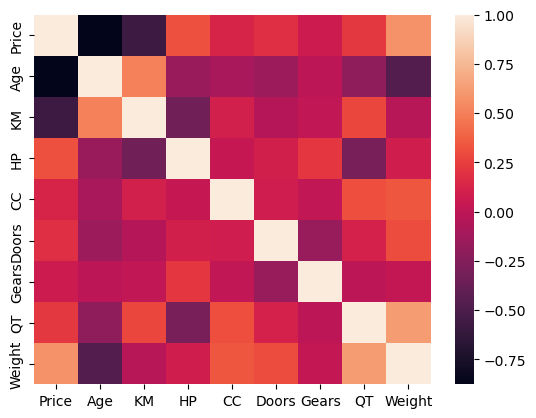

In [15]:
sns.heatmap(data_3.corr())

In [16]:
data_3.corr()

C:\Users\CSC\AppData\Local\Temp\ipykernel_8404\3847851589.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_3.corr()


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


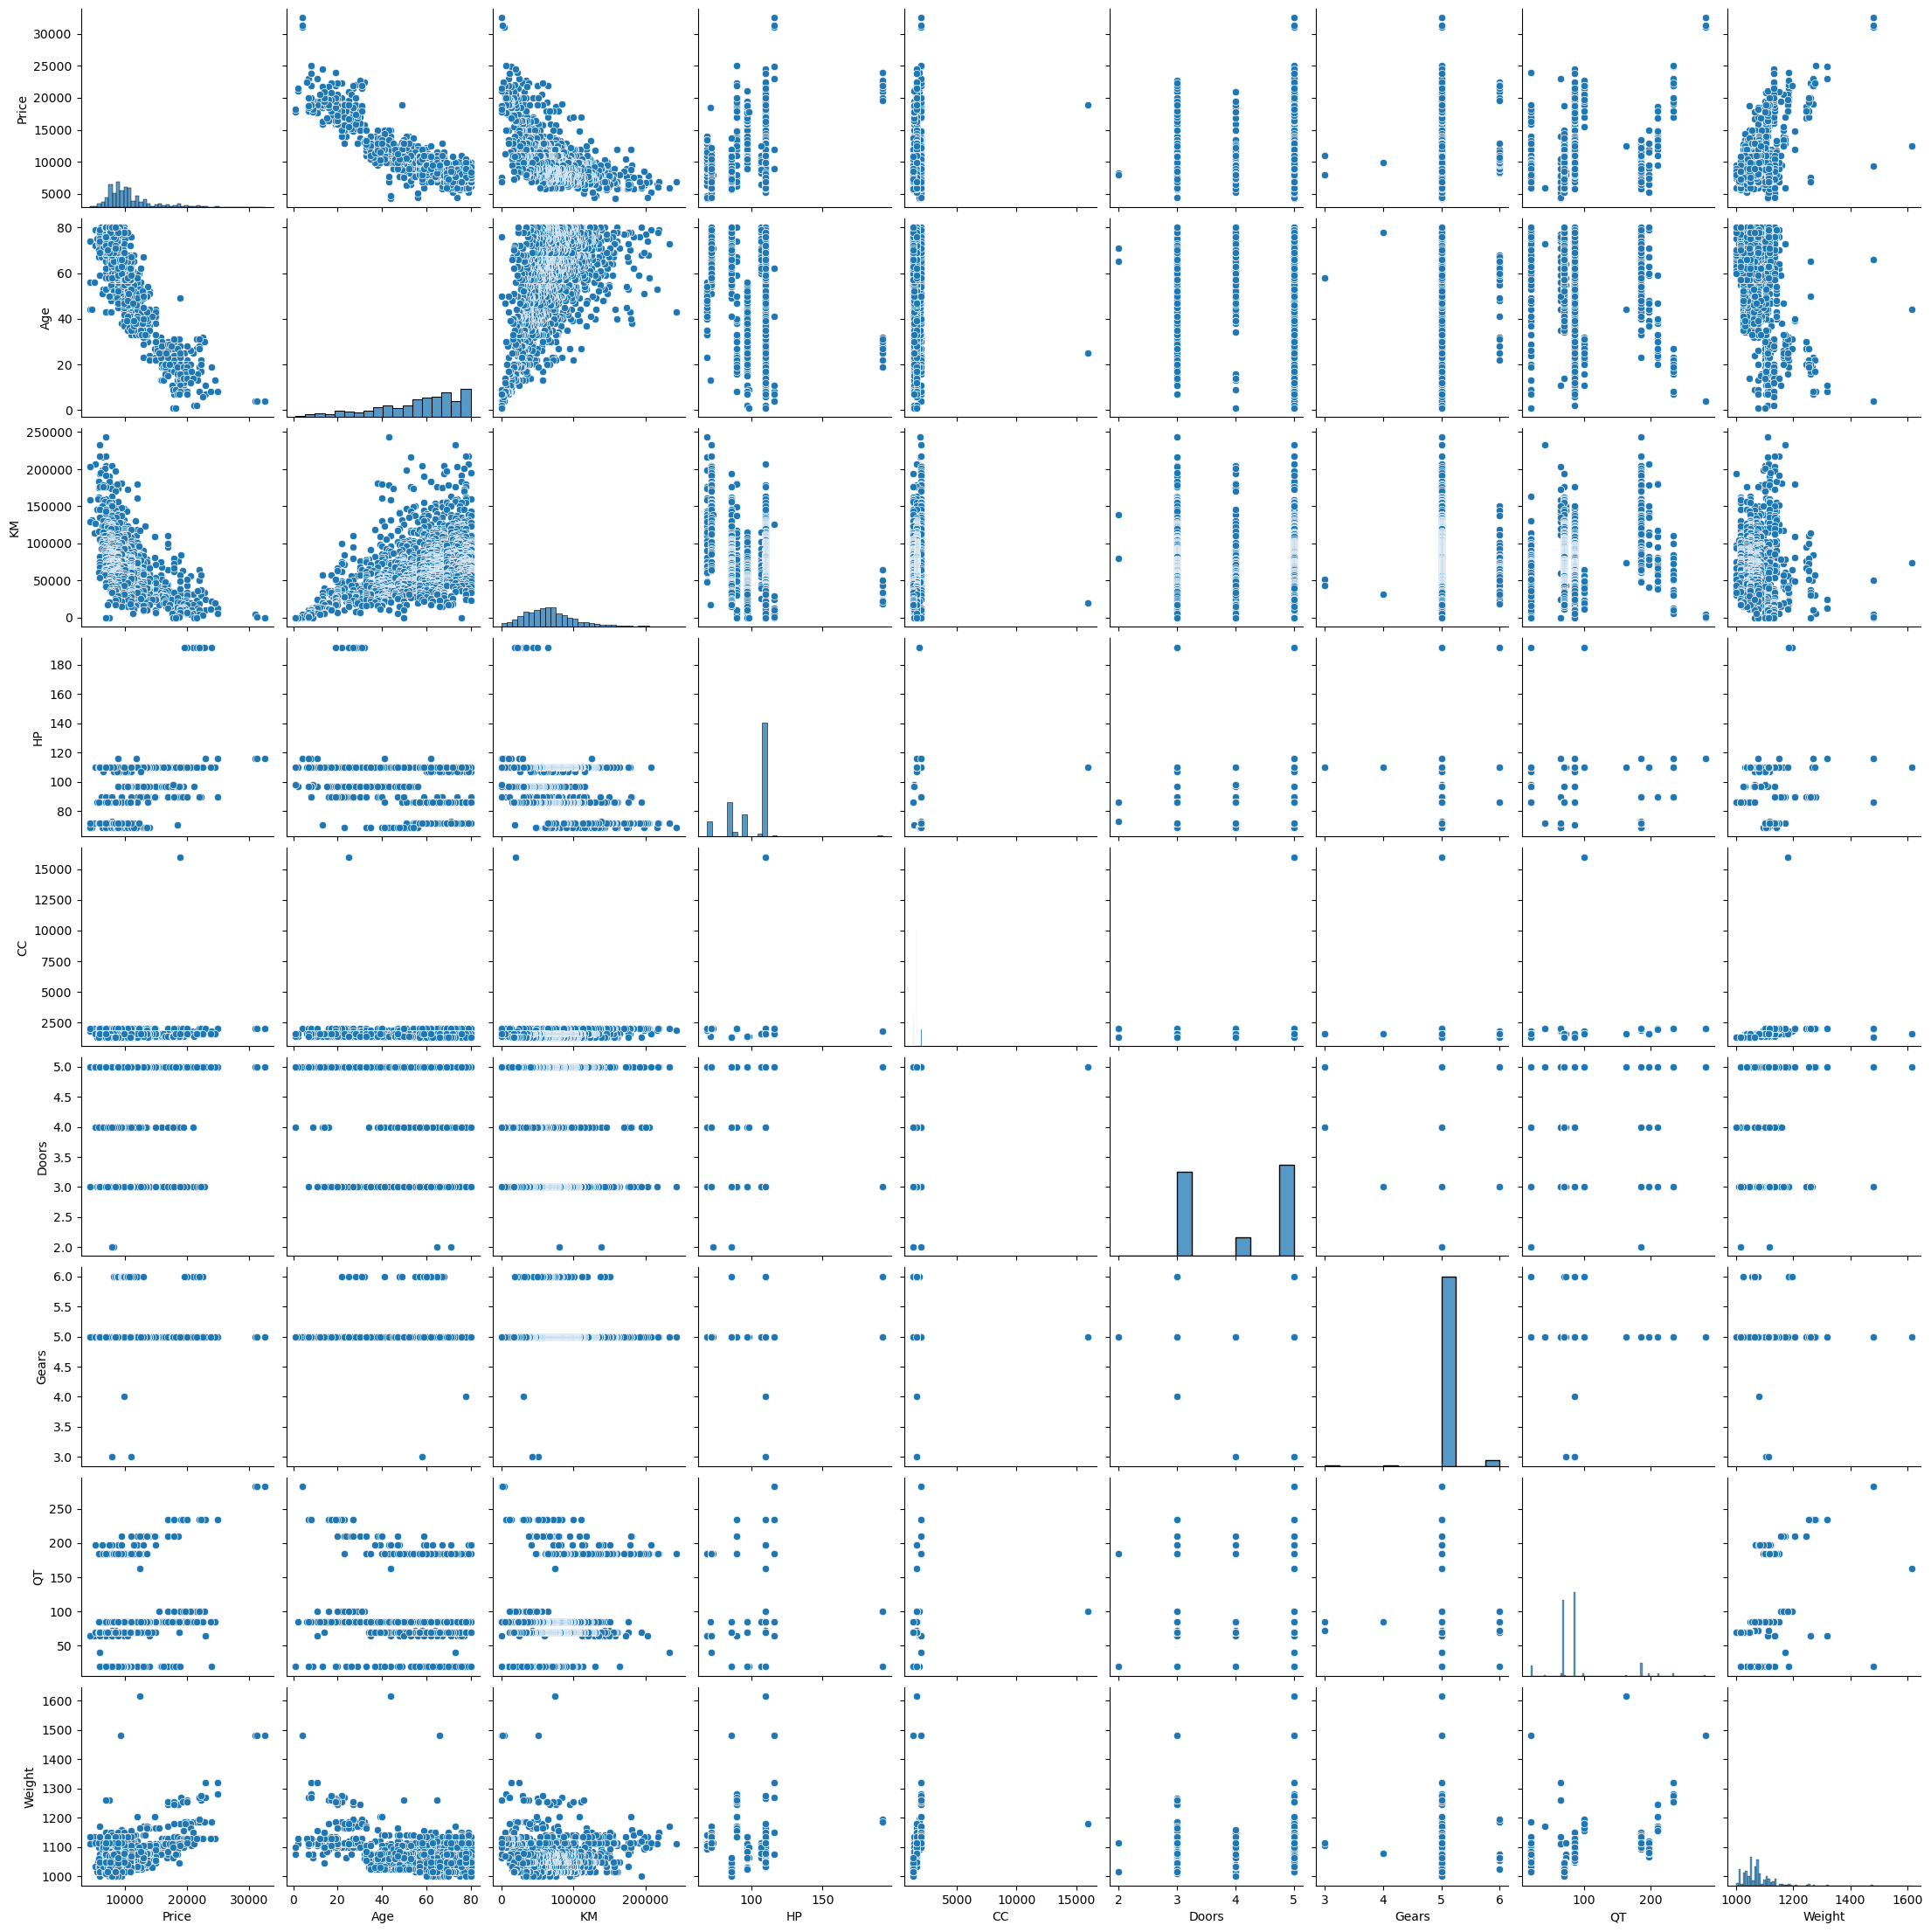

In [17]:
sns.pairplot(data_3)

C:\Users\CSC\AppData\Local\Temp\ipykernel_8404\4054119486.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Price'])


<Axes: xlabel='Price', ylabel='Density'>

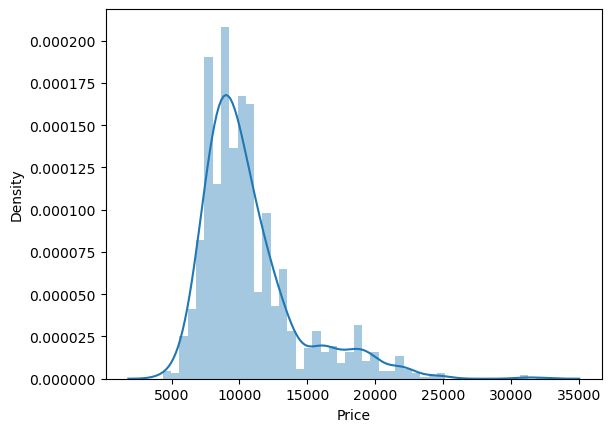

In [18]:
sns.distplot(data_3['Price'])

C:\Users\CSC\AppData\Local\Temp\ipykernel_8404\3318402263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_3['Price']))


<Axes: xlabel='Price', ylabel='Density'>

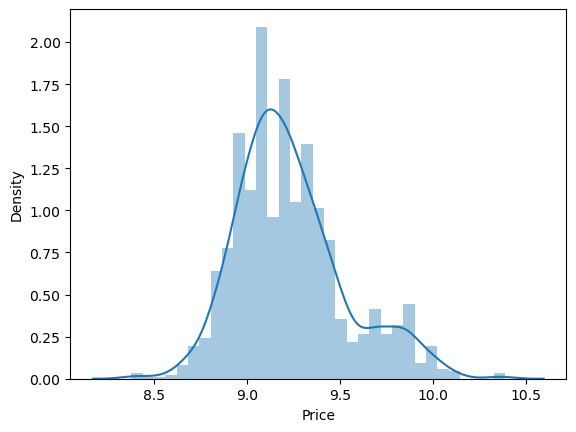

In [19]:
sns.distplot(np.log(data_3['Price']))

<Axes: >

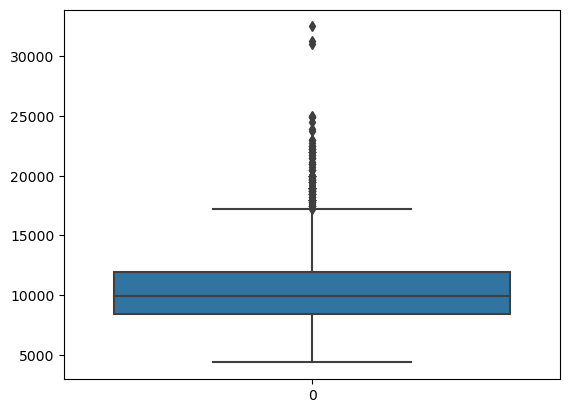

In [20]:
sns.boxplot(data_3['Price'])

<Axes: >

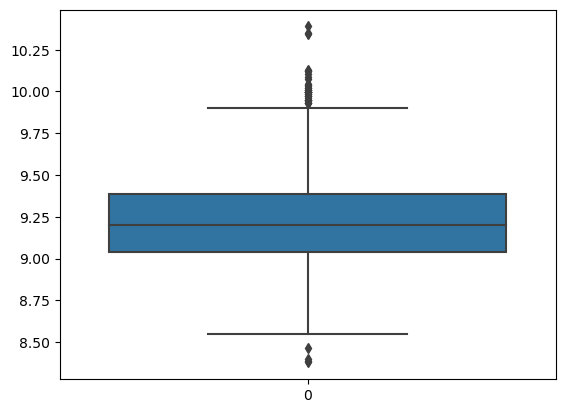

In [21]:
sns.boxplot(np.log(data_3['Price']))

<b>From above data visualization
    <br>
    <b>1. There are a lot of ouliers in the data.
    <br>
    <b>2. There is no linear relationship between the variables apart for some extent with Price-Age of the car

<b>DATA TRANSFORMATION

In [22]:
data_3

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,Diesel,90,2000,3,5,210,1165
1,13750,23,72937,Diesel,90,2000,3,5,210,1165
2,13950,24,41711,Diesel,90,2000,3,5,210,1165
3,14950,26,48000,Diesel,90,2000,3,5,210,1165
4,13750,30,38500,Diesel,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1300,3,5,69,1025
1432,10845,72,19000,Petrol,86,1300,3,5,69,1015
1433,8500,71,17016,Petrol,86,1300,3,5,69,1015
1434,7250,70,16916,Petrol,86,1300,3,5,69,1015


In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
r = data_3['FT'].values.reshape(-1,1)
enc_data = pd.DataFrame(enc.fit_transform(r).toarray())
data_4 = data_3.join(enc_data)
data_4

,Price,Age,KM,FT,HP,CC,Doors,Gears,QT,Weight,0,1,2
0,13500,23,46986,Diesel,90,2000,3,5,210,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90,2000,3,5,210,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90,2000,3,5,210,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90,2000,3,5,210,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90,2000,3,5,210,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1300,3,5,69,1025,0.0,0.0,1.0
1432,10845,72,19000,Petrol,86,1300,3,5,69,1015,0.0,0.0,1.0
1433,8500,71,17016,Petrol,86,1300,3,5,69,1015,0.0,0.0,1.0
1434,7250,70,16916,Petrol,86,1300,3,5,69,1015,0.0,0.0,1.0


<b>Therefore from above encoder, CNG = 0, Diesel = 1, Petrol = 2.

In [24]:
data_5 = data_4.drop(['FT'],axis=1)
data_5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight,0,1,2
0,13500,23,46986,90,2000,3,5,210,1165,0.0,1.0,0.0
1,13750,23,72937,90,2000,3,5,210,1165,0.0,1.0,0.0
2,13950,24,41711,90,2000,3,5,210,1165,0.0,1.0,0.0
3,14950,26,48000,90,2000,3,5,210,1165,0.0,1.0,0.0
4,13750,30,38500,90,2000,3,5,210,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,0.0,0.0,1.0
1432,10845,72,19000,86,1300,3,5,69,1015,0.0,0.0,1.0
1433,8500,71,17016,86,1300,3,5,69,1015,0.0,0.0,1.0
1434,7250,70,16916,86,1300,3,5,69,1015,0.0,0.0,1.0


In [25]:
data_5.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
0         0
1         0
2         0
dtype: int64

<b>X and Y

In [26]:
x = data_5.drop(['Price'],axis=1)
y = data_5['Price']

In [27]:
x.columns = x.columns.astype(str)
x.shape

(1436, 11)

In [28]:
y.shape

(1436,)

<b>TRAIN TEST SPLIT

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [30]:
x_train.shape

(1148, 11)

In [31]:
y_train.shape

(1148,)

<b>MODEL BUILDING

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
model.intercept_

-7064.3963775465745

In [34]:
model.coef_

array([-1.23316234e+02, -1.71358790e-02,  2.29272367e+01, -5.07328372e-03,
       -2.53154128e+01,  6.24915469e+02,  1.41132493e+01,  1.69463267e+01,
       -8.28527172e+02, -4.76804197e+02,  1.30533137e+03])

In [35]:
co_efficient = pd.DataFrame(model.coef_,x.columns,columns=['co_efficient'])
co_efficient

,co_efficient
Age,-123.316234
KM,-0.017136
HP,22.927237
CC,-0.005073
Doors,-25.315413
Gears,624.915469
QT,14.113249
Weight,16.946327
0,-828.527172
1,-476.804197


In [36]:
y_pred = model.predict(x_test)
y_pred

array([11215.37866077, 11322.96515299, 11704.71861457, 19180.51500774,
       10094.08977972, 15512.49844764, 16111.98445974, 10357.47174571,
       12217.39291912,  9282.10767116, 11141.73825066,  9871.50455467,
       14721.8004775 , 16625.56846099, 11738.93143364,  9943.96525338,
        7632.77319647,  7566.49441504,  7577.5144085 , 11191.77302937,
        9356.43091492, 10154.21239813, 14042.08051446,  8035.12935189,
        6980.00547139, 11156.51176166,  8263.7486664 ,  7814.2272299 ,
       10480.24990642, 16592.64398854,  8002.93176731,  9646.95082046,
        8632.46790742, 10119.963175  ,  9171.0162778 ,  7200.87774922,
        9132.44281902,  8372.93467567,  7676.60216792,  5675.11735049,
        8345.41392391,  9336.79449446,  9419.17605007,  5592.20232446,
        7723.94532006, 16056.25922237, 10610.49124648, 12945.69578246,
        8143.16298654,  8607.69047637,  8282.13978661, 19310.48439649,
       11760.40593271,  8749.29165419, 15511.77293288, 13758.30750013,
      

<Axes: ylabel='Price'>

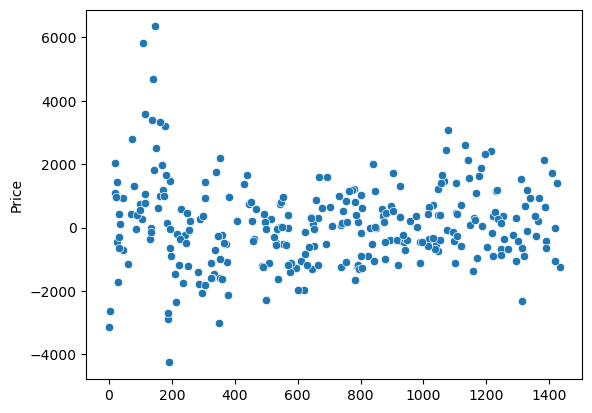

In [37]:
sns.scatterplot(y_test-y_pred)

C:\Users\CSC\AppData\Local\Temp\ipykernel_8404\520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Price', ylabel='Density'>

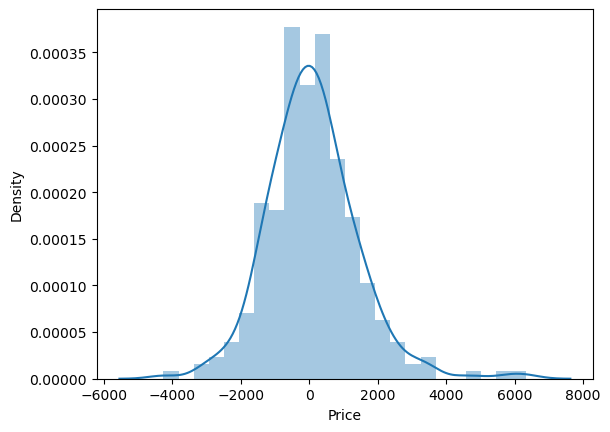

In [38]:
sns.distplot(y_test-y_pred)

In [63]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R_squared',metrics.r2_score(y_test,y_pred))

MAE:  980.0713586556881
MSE:  1769704.054565494
RMSE:  1330.302241810294
R_squared 0.8894741021631755


In [40]:
model.score(x_train,y_train)

0.8613245437470136

In [41]:
model.predict([[30,45000,90,2000,3,5,210,1170,0,0,1]])

D:\Anaconda\Installation\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17663.25387687])

In [42]:
model.predict([[15,45000,100,2000,3,6,210,1160,0,0,1]])

D:\Anaconda\Installation\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20197.72195723])

<b>Since there are lot of outliers in the data, the performace of the model is little hindered as shown by the r_sqaured value of 0.889 meaning the model is only able to explain 88.9% of variation in the data or the model is only 88.9% fit for the given data. 
    
<b> But or model is performimg well on both training and test data, which means overfitting is avoided.
    
<b>The Regression Equation is given by <br>
    Price  = -7064.39 - (123.31*Age of car) - (0.017*KM driven) + (22.92*HP) - (.005*CC) - (25.31*doors(seating capacity)) + (624.91*no_of_gears in car) + (14.11*Quaterly tax) + (16.94*weight of car) - (828.52*CNG) - (476.80*Diesel) + (1305.3313*Petrol) 
    
Therefore, a younger toyota corolla with high power and gears with petrol as fuel type fetches good price

In [43]:
from sklearn.linear_model import Ridge

In [56]:
ridge = Ridge(alpha=2)

In [57]:
ridge.fit(x_train,y_train)

Ridge(alpha=2)

In [58]:
y_pred_2 = ridge.predict(x_test)
y_pred_2

array([11213.02019392, 11315.07546769, 11694.59591264, 19166.01287177,
       10102.1643561 , 15503.26201047, 16101.40046625, 10355.4653964 ,
       12216.02815586,  9271.55935054, 11139.37700466,  9870.1624333 ,
       14751.21530331, 16632.00286735, 11752.07046544,  9940.85995275,
        7634.98303635,  7559.55494595,  7572.82513407, 11185.87518265,
        9341.96461615, 10149.41085717, 14044.27388149,  8025.22133481,
        6975.60875401, 11150.16393018,  8267.67646701,  7814.76032361,
       10446.60927596, 16599.8709923 ,  8007.20840578,  9636.65252365,
        8628.57252558, 10114.74729604,  9176.62296081,  7206.49596661,
        9130.62305466,  8368.54593367,  7679.87887834,  5658.57153923,
        8341.90385011,  9480.63183645,  9421.52805684,  5582.09253373,
        7717.26910879, 16042.77107793, 10573.6678764 , 12943.00393356,
        8163.25539998,  8602.63718479,  8278.48927354, 19308.95140827,
       11754.89144719,  8748.73385639, 15501.17044831, 13783.23344132,
      

<Axes: ylabel='Price'>

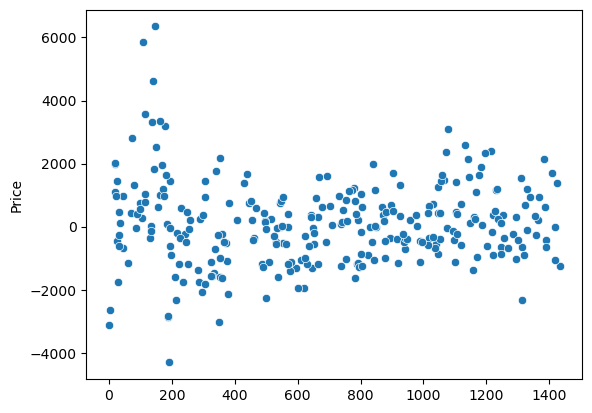

In [59]:
sns.scatterplot(y_test-y_pred_2)

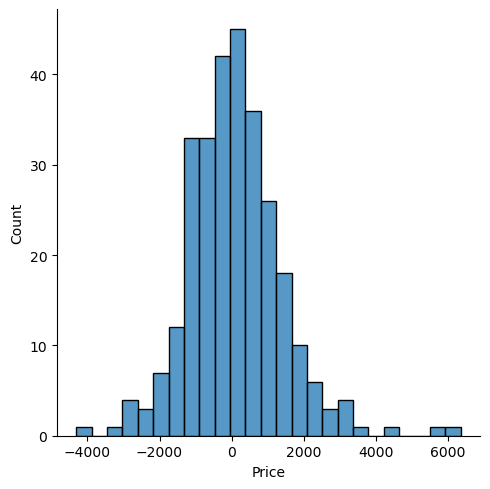

In [60]:
sns.displot(y_test-y_pred_2)

In [62]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_2))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_2)))
print('R_squared:',metrics.r2_score(y_test,y_pred_2))

MAE: 981.5512095826115
MSE: 1773180.5430343826
RMSE: 1331.608254342989
R_squared: 0.8892569799791854


In [64]:
from sklearn.linear_model import Lasso

In [65]:
lasso = Lasso(alpha=1)

In [66]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [71]:
y_pred_3 = lasso.predict(x_test)

In [72]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_3))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_3)))
print('R_squared:',metrics.r2_score(y_test,y_pred_3))

MAE: 981.0607624526721
MSE: 1772261.360401642
RMSE: 1331.2630695702642
R_squared: 0.8893143870272721


In [73]:
from sklearn.linear_model import ElasticNet

In [78]:
e_net = ElasticNet(alpha = 1,l1_ratio=1)

In [79]:
e_net.fit(x_train,y_train)

ElasticNet(alpha=1, l1_ratio=1)

In [80]:
y_pred_4 = e_net.predict(x_test)

In [81]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_4))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_4))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_4)))
print('R_squared:',metrics.r2_score(y_test,y_pred_4))

MAE: 981.0607624526721
MSE: 1772261.360401642
RMSE: 1331.2630695702642
R_squared: 0.8893143870272721
